In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.etc_functions import (
    load_image_and_metadata,
    preprocess_candidate,
    to_int8,
    detect_marker_candidates,
    compute_descriptors,
    compute_score,
    compute_candidate_center,
)

In [4]:
IDENT_PATH = os.path.join("Archive", "weakmarker_script", "weakmarker_script", "images", "coarse")
image, meta = load_image_and_metadata(IDENT_PATH)

for key, value in meta.items():
    print(f"{key}: {value}")

Description: video 16 bit
Position [mm]: (68.053001, 61.081993)
Deflection [mm]: (0.0, 0.0)
Exel Size [nm]: (176.0, 176.0)
Image Size [exels]: (256, 256)
Image Size [mm]: (0.045056, 0.045056)
Sample Average: 4
Frame Average: 4
Image Type [bit]: 16
Scan Method: main


In [7]:
image = to_int8(image)
marker_candidates = detect_marker_candidates(image)
marker_candidates = [preprocess_candidate(c) for c in marker_candidates]
candidate_scores = [compute_score(compute_descriptors(c)) for c in marker_candidates]

best_candidate_index = np.argmax(candidate_scores)
best_candidate = marker_candidates[best_candidate_index]
best_score = candidate_scores[best_candidate_index]

center = compute_candidate_center(best_candidate)

Contour  0 | Score: 0.64
Contour  1 | Score: 0.72
Contour  2 | Score: 0.65
Contour  3 | Score: 0.70
Contour  4 | Score: 0.81
Contour  5 | Score: 0.81
Contour  6 | Score: 0.69
Contour  7 | Score: 0.83
Contour  8 | Score: 0.81
Contour  9 | Score: 1.00
Best candidate score: 1.00


True

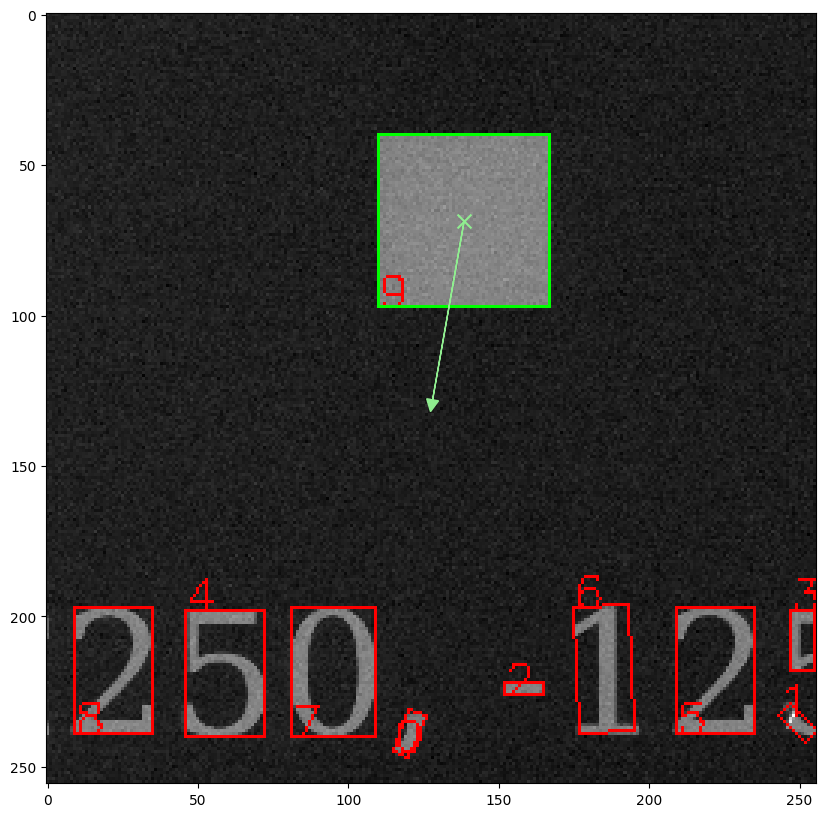

In [ ]:
draw_image = image.copy()
draw_image = cv2.cvtColor(draw_image, cv2.COLOR_GRAY2BGR)

SCORE_THRESHOLD = 0.95
best_candidate = None
best_score = 0
for i, candidate in enumerate(marker_candidates):
    descriptors = compute_descriptors(candidate)
    score = compute_score(descriptors)

    if score > best_score and score > SCORE_THRESHOLD:
        best_score = score
        best_candidate = candidate
        
    print(f"Contour {i:>2} | Score: {score:.2f}")
        
    cv2.drawContours(draw_image, [candidate], -1, (255, 0, 0), 1)
    cv2.putText(
        draw_image,
        str(i),
        tuple(candidate[0][0]),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (255, 0, 0),
        1,
    )

if best_candidate is not None:
    print(f"Best candidate score: {best_score:.2f}")
    cv2.drawContours(draw_image, [best_candidate], -1, (0, 255, 0), 1)

plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(draw_image, cmap="gray")
plt.scatter(
    center[0],
    center[1],
    marker="x",
    color="lightgreen",
    s=100,
    label="Center of best candidate",
)

plt.arrow(
    center[0],
    center[1],
    image.shape[1] // 2 - center[0],
    image.shape[0] // 2 - center[1],
    head_width=4,
    head_length=4,
    fc="lightgreen",
    ec="lightgreen",
)

cv2.imwrite("contours.png", draw_image)
cv2.imwrite("image.png", image)